Point Cloud Processing # LESSON 01

In [1]:
!pip3 install open3d

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import open3d as o3d


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [4]:
number_points = 5 
pcd = np.random.rand(number_points, 3)
print(pcd)

[[0.72845251 0.40381837 0.28612125]
 [0.68817111 0.68476072 0.3662103 ]
 [0.56722063 0.42900158 0.14819308]
 [0.27483968 0.73005293 0.07528985]
 [0.13372939 0.80687364 0.93477144]]


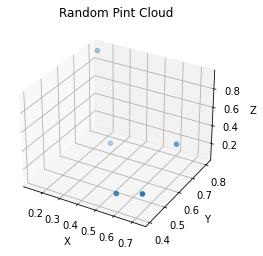

In [6]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter3D(pcd[:,0],pcd[:,1],pcd[:,2])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Random Pint Cloud")
plt.show()


In [7]:
bunny = o3d.data.BunnyMesh()
mesh = o3d.io.read_triangle_mesh(bunny.path)

In [45]:
mesh = o3d.io.read_triangle_mesh("data/blade.ply")

In [46]:
mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh])

In [47]:
pcd = mesh.sample_points_uniformly(number_of_points=1000000)

o3d.visualization.draw_geometries([pcd])

In [40]:
o3d.io.write_point_cloud("output/bunny_pcd.ply", pcd)

[Open3D WARNING] Write Ply clamped color value to valid range


True

In [28]:
color_raw = o3d.io.read_image("data/rgb.jpg")
depth_raw = o3d.io.read_image("data/depth.png")

rgbd_iamge = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw, convert_rgb_to_intensity=False)

pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_iamge, o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
o3d.visualization.draw_geometries([pcd])

In [31]:
number_points = 200000
pcd_np = np.random.rand(number_points, 3)

pcd_o3d = o3d.geometry.PointCloud()
pcd_o3d.points = o3d.utility.Vector3dVector(pcd_np)

o3d.visualization.draw_geometries([pcd_o3d])

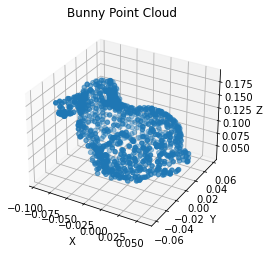

In [32]:
pcd_o3d = o3d.io.read_point_cloud("data/bunny_pcd.ply")

pcd_np = np.asarray(pcd_o3d.points)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter3D(pcd_np[:, 0], pcd_np[:, 2], pcd_np[:, 1])

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Bunny Point Cloud")
plt.show()